In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.externals import joblib

pd.options.display.max_columns = 4000
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 4000

/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [3]:
datafile = r"/Users/yilingtung/Documents/CornellTechWork/ProductStudio/dataset.xlsx"
data = pd.read_excel(datafile)

In [4]:
# Same sales person between referring company and listed company

for i in range(len(data)):
    if pd.isnull(data.iloc[i,4]):
        data.loc[i,'Same salesperson as referring company'] = "Not applicable"
    else:
        if data.iloc[i,4][:7] == "Company":                
            x = np.argwhere(data['Account Name'] == data.iloc[i,4])
            if len(x) == 0:
                data.loc[i,'Same salesperson as referring company'] = False
            else:
                assigned_salespeople = data.iloc[x[0],:]
                assigned_salespeople = assigned_salespeople['Opportunity Assigned to Full Name']
                if data.iloc[i, 2] in assigned_salespeople.item():
                    data.loc[i,'Same salesperson as referring company'] = True
                else:
                    data.loc[i,'Same salesperson as referring company'] = False
        else:
            data.loc[i,'Same salesperson as referring company'] = "Not applicable"

In [5]:
# Assign gender to salespeople

gender_list = {"Angustura Bitter": "Male", "Aslan in Narnia": "Male", "Boy 1": "Male", "Bulubelle Loon": "Female", 
               "Celine Dion": "Female", "Colin Rule": "Male", "Cruella De Vil": "Female", "D. Pushover": "Male", "Danny Kruger": "Male",
              "Daphne Duck": "Female", "Dell Pizaplace": "Female", "Donald Duck": "Male", "Eider Duck": "Male", "Fethry Duck": "Male", 
              "Former Duanne Read SalesGuy": "Male", "Georg Creepy": "Male", "Girl 1": "Female", "Girl 2": "Female",
              "Girl 3": "Female", "Grandma Duck": "Female", "Green MileMan": "Male", "Hanna SadGirl": "Female", "Hortense McDuck": "Male",
              "Humperdink Duck": "Male", "Ian Joshua Anderson": "Male", "James Lawrence": "Male", "Karan Girotra": "Male",
              "Kathleen Szabo": "Female", "Khoa Ma": "Male", "Kristina Ortiz": "Female", "Kristjan Petursson": "Male",
              "Leonardo Dicaprio": "Male", "Lulubelle Loon": "Female", "Manny Babysitter": "Male", "Mikey Christmas": "Male", 
                "Mikey Mouse": "Male", "Miss twotimer": "Female", "Money Funtimes": "Male", "Olafur Eiriksson": "Male",
              "Quackmore Duck": "Male", "Sheriff Dan Duck": "Male", "Single Seller": "Female", "Solvi Mar Magnusson": "Male",
              "Sunna Halldorsdottir": "Female", "Svava Kristinsdottir": "Female", "The Panini Man": "Male", "The Sucky Guy": "Male",
              "Tony M": "Male", "Unassigned Unassigned": "Unassigned", "Whitewater Duck": "Male", "Yi-Ling Irene Tung": "Female"}
data['Gender'] = data['Opportunity Assigned to Full Name'].replace(gender_list)

In [6]:
# Add in total sales column
data['Total Sales'] = (12 * data['Monthly Revenue']) + data['Fixed Revenue'] + data['Yearly Revenue']

In [7]:
# Update sales status

def find_status(x):
    if x['Sales Stage'] == "Live":
        if pd.isnull(x['Disqualified Date']):
            return "Live"
        else:
            return "Discontinued sales"
    else:
        if pd.isnull(x['Disqualified Date']):
            return "Current Prospect"
        else:
            return "Lost Prospect"

data['Status'] = data.apply(lambda x: find_status(x), axis=1)

In [8]:
data.groupby(['Opportunity Assigned to Full Name', 'Status']).size()

Opportunity Assigned to Full Name  Status            
Angustura Bitter                   Current Prospect        1
                                   Discontinued sales      1
                                   Live                    8
                                   Lost Prospect          71
Aslan in Narnia                    Discontinued sales     30
                                   Lost Prospect           6
Boy 1                              Current Prospect        5
                                   Discontinued sales      1
                                   Live                    1
                                   Lost Prospect          94
Bulubelle Loon                     Discontinued sales      2
Celine Dion                        Live                    4
                                   Lost Prospect           9
Colin Rule                         Current Prospect        3
                                   Discontinued sales     95
                               

/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


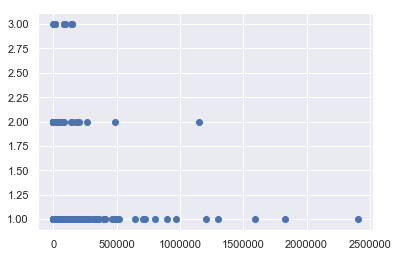

In [9]:
# Scatter plot comparing total sales to business area

statuses = ["Live", "Discontinued sales"]
data_live_and_discontinued = data[data['Status'].isin(statuses)]

opportunity_codes = {"eCommerce Business": 1, "POS Acquiring": 2, "Payment Terminal Business": 3}
data_live_and_discontinued['Opportunity Business Area Coded'] = data_live_and_discontinued['Opportunity Business Area'].replace(opportunity_codes)

plt.scatter(data_live_and_discontinued['Total Sales'], data_live_and_discontinued['Opportunity Business Area Coded'])
plt.show()

/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

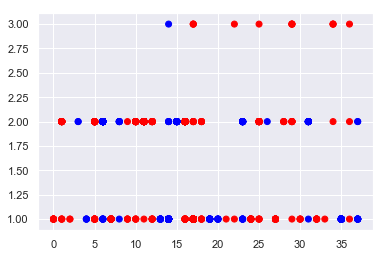

In [10]:
data_live_and_discontinued['Opportunity Assigned to Full Name'] = pd.Categorical(data_live_and_discontinued['Opportunity Assigned to Full Name'])
data_live_and_discontinued['Opportunity Assigned to Full Name Coded'] = data_live_and_discontinued['Opportunity Assigned to Full Name'].cat.codes
data_live_and_discontinued['Opportunity Assigned to Full Name Coded']

def code_gender(x):
    if x['Gender'] == "Male":
        return "red"
    else:
        return "blue"

data_live_and_discontinued['Gender color'] = data_live_and_discontinued.apply(lambda x: code_gender(x), axis=1)

plt.scatter(data_live_and_discontinued['Opportunity Assigned to Full Name Coded'], data_live_and_discontinued['Opportunity Business Area Coded'], c=data_live_and_discontinued['Gender color'])
plt.show()

/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

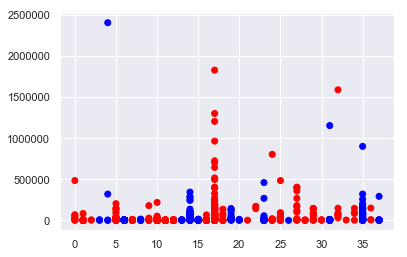

In [11]:
data_live_and_discontinued['Opportunity Assigned to Full Name'] = pd.Categorical(data_live_and_discontinued['Opportunity Assigned to Full Name'])
data_live_and_discontinued['Opportunity Assigned to Full Name Coded'] = data_live_and_discontinued['Opportunity Assigned to Full Name'].cat.codes
data_live_and_discontinued['Opportunity Assigned to Full Name Coded']

def code_gender(x):
    if x['Gender'] == "Male":
        return "red"
    else:
        return "blue"

data_live_and_discontinued['Gender color'] = data_live_and_discontinued.apply(lambda x: code_gender(x), axis=1)

plt.scatter(data_live_and_discontinued['Opportunity Assigned to Full Name Coded'], data_live_and_discontinued['Total Sales'], c=data_live_and_discontinued['Gender color'])
plt.show()

/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

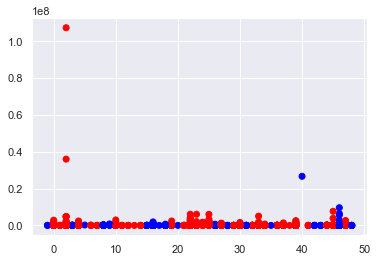

In [12]:
# statuses = ["Live", "Discontinued sales"]
data_lost_prospects = data[data['Status'] == "Lost Prospect"]

opportunity_codes = {"eCommerce Business": 1, "POS Acquiring": 2, "Payment Terminal Business": 3}
data_lost_prospects['Opportunity Business Area Coded'] = data_lost_prospects['Opportunity Business Area'].replace(opportunity_codes)


data_lost_prospects['Opportunity Assigned to Full Name'] = pd.Categorical(data_lost_prospects['Opportunity Assigned to Full Name'])
data_lost_prospects['Opportunity Assigned to Full Name Coded'] = data_lost_prospects['Opportunity Assigned to Full Name'].cat.codes
data_lost_prospects['Opportunity Assigned to Full Name Coded']

def code_gender(x):
    if x['Gender'] == "Male":
        return "red"
    else:
        return "blue"

data_lost_prospects['Gender color'] = data_lost_prospects.apply(lambda x: code_gender(x), axis=1)

plt.scatter(data_lost_prospects['Opportunity Assigned to Full Name Coded'], data_lost_prospects['Total Sales'], c=data_lost_prospects['Gender color'])
plt.show()

/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


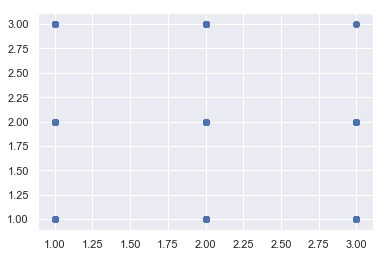

In [13]:
# NOT WORTH IT

def color_success(x):
    if x['Success'] == 1:
        return "red"
    elif x['Success'] == 2:
        return "blue"

# data_live_and_discontinued['Gender coded'] = data_live_and_discontinued.apply(lambda x: code_gender(x), axis=1)

opportunity_codes = {"eCommerce Business": 1, "POS Acquiring": 2, "Payment Terminal Business": 3}
data['Opportunity Business Area Coded'] = data['Opportunity Business Area'].replace(opportunity_codes)
gender_codes = {"Male": 1, "Female": 2, "Unassigned": 3}
data['Gender coded'] = data['Gender'].replace(gender_codes)

data_drop_current_prospects = data[data['Status'] != "Current Prospect"]

success_codes = {"Live": 2, "Discontinued sales": 2, "Lost Prospect": 1, "Current Prospect": 0}
data_drop_current_prospects['Success'] = data_drop_current_prospects['Status'].replace(success_codes)
data_drop_current_prospects['Success color'] = data_drop_current_prospects.apply(lambda x: color_success(x), axis=1)

plt.scatter(data_drop_current_prospects['Gender coded'], data_drop_current_prospects['Opportunity Business Area Coded'])

plt.show()

In [17]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


data_drop_current_prospects = data[data['Status'] != "Current Prospect"]

# Code success variables
success_codes = {"Live": 2, "Discontinued sales": 2, "Lost Prospect": 1, "Current Prospect": 0}
data_drop_current_prospects['Success'] = data_drop_current_prospects['Status'].replace(success_codes)

# Fill N/As
values_for_na = {'Opportunity Business Area Coded': 1, 'Gender coded': 3}
data_drop_current_prospects = data_drop_current_prospects.fillna(value = values_for_na)

# Code sales people names
# data_drop_current_prospects['Opportunity Assigned to Full Name'] = pd.Categorical(data_drop_current_prospects['Opportunity Assigned to Full Name'])
# data_drop_current_prospects['Opportunity Assigned to Full Name Coded'] = data_drop_current_prospects['Opportunity Assigned to Full Name'].cat.codes
# data_drop_current_prospects['Opportunity Assigned to Full Name Coded']

data_drop_current_prospects = data_drop_current_prospects[data_drop_current_prospects['Opportunity Assigned to Full Name'] != "Unassigned Unassigned"]

dummies = pd.get_dummies(data_drop_current_prospects['Opportunity Assigned to Full Name'])
dummies_columns = dummies.columns
data_drop_current_prospects = pd.concat([data_drop_current_prospects, dummies], axis=1)

dummies_vertical = pd.get_dummies(data_drop_current_prospects['Opportunity Business Area Coded'])
dummies_vertical_cols = dummies_vertical.columns
data_drop_current_prospects = pd.concat([data_drop_current_prospects, dummies_vertical], axis=1)

# Code same sales person as referral
sales_person_referal_dict = {True: 1, False: 0, "Not applicable": -1}
data_drop_current_prospects['Sales Person Referral Coded'] = data_drop_current_prospects['Same salesperson as referring company'].replace(sales_person_referal_dict)

# Code opportunity sales process
sales_process_dict = {"New Business": 1, "Upsell": 0}
data_drop_current_prospects['Sales Process Coded'] = data_drop_current_prospects['Opportunity Sales Process'].replace(sales_process_dict)

# X variable columns
# columns = ['Gender coded', 'Opportunity Business Area Coded', 'Sales Person Referral Coded', 'Sales Process Coded']
columns = ['Gender coded', 'Sales Person Referral Coded', 'Sales Process Coded']
for column in dummies_vertical_cols:
    columns.append(column)
for column in dummies_columns:
    columns.append(column)

# Predictive variables: gender, vertical, Same salesperson as referring company, total sales, opportunity sales process
X = data_drop_current_prospects.loc[:,columns].as_matrix()
y = data_drop_current_prospects['Success'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

outputFilename = 'pretrained_model.joblib'
log_reg = LogisticRegression().fit(X_train,y_train)

# Write classifier to file
joblib.dump(log_reg, outputFilename)
print("Dumped model to %s" % outputFilename)

#Read classifier from file
log_reg_file = joblib.load(outputFilename)

print(log_reg.score(X_test, y_test))
print(log_reg_file.score(X_test, y_test))

Dumped model to pretrained_model.joblib
0.8366013071895425
0.8366013071895425


/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/yilingtung/miniconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [ ]:
data_drop_current_prospects.groupby(['Status']).size()
# data_drop_current_prospects.loc[:,['Gender coded', 'Opportunity Business Area Coded', 'Sales Person Referral Coded', 'Total Sales', 'Sales Process Coded']]
# np.any(np.isnan(X))
# np.argwhere(np.isnan(X[:,4]))
# X[[3470, 3635],:]

In [ ]:
import copy

X_test_sales_person = copy.deepcopy(X_test)

# TEST IF WE ALWAYS GET AT LEAST ONE GREEN
# lead = 9

count_no_green = 0
for lead in range(len(X_test_sales_person)):

    for i in range(50):
        X_test_sales_person[lead,6+i] = 0

    X_test_sales_person_row = X_test_sales_person[lead,:].reshape(1,-1) 
    green = False
    for i in range(50):
        X_test_sales_person_row[0][6+i] = 1
        prob = log_reg.predict_proba(X_test_sales_person_row)[0][1]
        if prob > 0.7:
            green = True
        X_test_sales_person_row[0][6+i] = 0
    if green:
        result = " can have a 70% chance of success."
    else:
        result = " cannot have a 70% chance of success."
        count_no_green += 1
    print("Lead number "+str(lead)+result)
print(count_no_green)

In [ ]:
# TEST LEADS INDIVIDUALLY

lead = 7

for i in range(50):
    X_test_sales_person[lead,6+i] = 0
    
X_test_sales_person_row = X_test_sales_person[lead,:].reshape(1,-1) 
    
for i in range(50):
    X_test_sales_person_row[0][6+i] = 1
    prob = log_reg.predict_proba(X_test_sales_person_row)[0][1]
    color = "Red"
    if prob > 0.7:
        color = "Green"
    elif prob > 0.5:
        color = "Yellow"
    print("\nSalesperson: "+dummies_columns[i])
    print(color)
    X_test_sales_person_row[0][6+i] = 0

In [ ]:
# TEST LEADS INDIVIDUALLY

lead = 66

for i in range(50):
    X_test_sales_person[lead,6+i] = 0
    
X_test_sales_person_row = X_test_sales_person[lead,:].reshape(1,-1) 
    
for i in range(50):
    X_test_sales_person_row[0][6+i] = 1
    prob = log_reg.predict_proba(X_test_sales_person_row)[0][1]
    color = "Red"
    if prob > 0.7:
        color = "Green"
    elif prob > 0.5:
        color = "Yellow"
    print("\nSalesperson: "+dummies_columns[i])
    print(color)
    X_test_sales_person_row[0][6+i] = 0